In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [235]:
data = pd.read_csv('/Users/cosaph/Desktop/fc servette/data_management/data.csv')
#print(data.head())

In [236]:
print(len(data['PLAYER_NAME']))

1076


In [237]:
# toutes mes va 
# Accélération max,Distance [20-25]km/h,
# Distance [25-40]km/h,Distance m/min,Distance totale,Décélération max,Nb acc [4/5] ms²,
# Nb dec [-5/-4] ms²,Nombre de sprints,Vmax,Distance en sprint

data['Accélération_max'] = data['Accélération max']
data['Distance_20_25km_h'] = data['Distance [20-25]km/h']

data['Distance_2540km_h'] = data['Distance [25-40]km/h']
data['Distancemmin'] = data['Distance m/min']
data['Distance_totale'] = data['Distance totale']
data['Deceleration_max'] = data['Décélération max']
data['Nb_acc_4_5ms'] = data['Nb acc [4/5] ms²']

data['Nb_dec_5_4ms'] = data['Nb dec [-5/-4] ms²']
data['Nombre_de_sprints'] = data['Nombre de sprints']
#data['Distance_en_sprint'] = data['Distance en sprint']

In [238]:
""" # pour le min group size , on va enlever les joueurs qui ont moins de 10 matchs

group_sizes = data.groupby("PLAYER_NAME").size()
#print(group_sizes)

data = data[data["PLAYER_NAME"].isin(group_sizes[group_sizes > 22].index)]

# pour le max group size , on va enlever les joueurs qui ont plus de 50 matchs

group_sizes = data.groupby("PLAYER_NAME").size()
#print(group_sizes)

#data = data[data["PLAYER_NAME"].isin(group_sizes[group_sizes < 50].index)] """

' # pour le min group size , on va enlever les joueurs qui ont moins de 10 matchs\n\ngroup_sizes = data.groupby("PLAYER_NAME").size()\n#print(group_sizes)\n\ndata = data[data["PLAYER_NAME"].isin(group_sizes[group_sizes > 22].index)]\n\n# pour le max group size , on va enlever les joueurs qui ont plus de 50 matchs\n\ngroup_sizes = data.groupby("PLAYER_NAME").size()\n#print(group_sizes)\n\n#data = data[data["PLAYER_NAME"].isin(group_sizes[group_sizes < 50].index)] '

In [239]:
print(data.columns)

Index(['SESSION_ID', 'PLAYER_ID', 'PLAYER_NAME', 'ATTENDANCE', 'DURATION',
       'DATE', 'TEAM_ID', 'TYPE_ID', 'Accélération max',
       'Distance [20-25]km/h', 'Distance [25-40]km/h', 'Distance m/min',
       'Distance totale', 'Décélération max', 'Nb acc [4/5] ms²',
       'Nb dec [-5/-4] ms²', 'Nombre de sprints', 'Vmax', 'Distance en sprint',
       'Durée', 'Accélération_max', 'Distance_20_25km_h', 'Distance_2540km_h',
       'Distancemmin', 'Distance_totale', 'Deceleration_max', 'Nb_acc_4_5ms',
       'Nb_dec_5_4ms', 'Nombre_de_sprints'],
      dtype='object')


Distancemmin + Nombre_de_sprints + Accélération_max + Nb_acc_4_5ms + Vmax 

In [262]:

# label = 1 si le joueur est Servette PRO 0 sinon

data['label'] = np.where(data['TEAM_ID'] == 'Servette PRO', 1, 0)

## modèle logistique simple
model = smf.logit("label ~  Distance_20_25km_h + Distance_2540km_h + Distancemmin + Deceleration_max + Nb_acc_4_5ms + Nb_dec_5_4ms + Nombre_de_sprints ", data=data)
results = model.fit()
print(results.summary())

print("AIC:", results.aic)
print("BIC:", results.bic)

# null deviance  'LogitResults' object has no attribute 'null_deviance'

#null deviance = -2 * log likelihood du modèle nul

null_deviance = -2 * results.llnull
print("Null deviance:", null_deviance)

# residual deviance = -2 * log likelihood du modèle complet
residual_deviance = -2 * results.llf
print("Residual deviance:", residual_deviance)




Optimization terminated successfully.
         Current function value: 0.263842
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 1076
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            7
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.6164
Time:                        10:28:54   Log-Likelihood:                -283.89
converged:                       True   LL-Null:                       -739.99
Covariance Type:            nonrobust   LLR p-value:                1.122e-192
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -11.3666      1.253     -9.071      0.000     -13.823      -8.911
Dista

In [264]:
import scipy.stats as stats

# Données du modèle
null_deviance = 1479.97
residual_deviance = 567.78
df_model = 10

# Calcul de la statistique du chi-deux
chi2_stat = null_deviance - residual_deviance

# Calcul du p-value
p_value = 1 - stats.chi2.cdf(chi2_stat, df_model)

print(f"Chi-deux Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {df_model}")
print(f"P-value: {p_value:.3e}")

# Interprétation
if p_value < 0.05:
    print("Le modèle est significatif au niveau de 5%.")
else:
    print("Le modèle n'est pas significatif au niveau de 5%.")


Chi-deux Statistic: 912.19
Degrees of Freedom: 10
P-value: 0.000e+00
Le modèle est significatif au niveau de 5%.


In [242]:
# modele linéaire 
model_lin = smf.ols("label ~ Distancemmin + Nombre_de_sprints + Accélération_max + Deceleration_max + Nb_acc_4_5ms + Nb_dec_5_4ms + Nombre_de_sprints ", data)
results_lin = model_lin.fit()
print(results_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     82.62
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.27e-85
Time:                        10:27:06   Log-Likelihood:                -570.11
No. Observations:                1076   AIC:                             1154.
Df Residuals:                    1069   BIC:                             1189.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9328      0.13

In [243]:


data_player = data[data['PLAYER_NAME'] == 'A.Antunes']
# mettre les données dans le model
# voir la proba que le joueur soit pro

#print(results_lmm.predict(data_player))

print('-----------------')
print(results.predict(data_player))

# ajouter le results dans le dataframe data.csv dans la colonne proba_pro

data['proba_pro'] = results.predict(data)

# save the data
data.to_csv('data_model.csv', index=False)

print('-----------------')
#print(results_lin.predict(data_player))


-----------------


3      0.999844
10     0.784407
20     0.999738
82     0.879031
90     0.853679
94     0.818316
116    0.935140
120    0.954905
128    0.985370
141    0.998763
149    0.999862
156    0.990530
218    0.813440
234    0.516117
239    0.785898
254    0.999722
264    0.996001
268    0.417926
281    0.565133
289    0.944206
300    0.986350
306    0.972715
325    0.806550
332    0.999976
343    0.996052
354    0.997942
367    0.999975
381    0.993317
390    0.555057
395    0.848850
406    0.999031
414    0.968997
427    0.998970
441    0.993548
449    0.884895
457    0.930678
dtype: float64
-----------------


In [244]:
import plotly.express as px
import pandas as pd

# Assurez-vous que la colonne DATE est au format datetime
data['months'] = pd.to_datetime(data['DATE'])

# Calculez la moyenne de proba_pro pour chaque joueur (si nécessaire pour un autre graphique)
proba_means = data.groupby('PLAYER_NAME')['proba_pro'].mean()

# Mettez en correspondance TEAM_ID à des valeurs numériques
team_id_mapping = {team: idx for idx, team in enumerate(data['TEAM_ID'].unique())}
data['TEAM_ID_NUMERIC'] = data['TEAM_ID'].map(team_id_mapping)

# Créez le graphique avec Plotly
fig = px.scatter(
    data,
    x='months',
    y='proba_pro',
    color='TEAM_ID_NUMERIC',
    color_continuous_scale='Viridis',  # Utilisation de la carte de couleurs Viridis
    hover_name='PLAYER_NAME',
    labels={
        'DATE': 'Date',
        'proba_pro': 'Probability (proba_pro)',
        'TEAM_ID_NUMERIC': 'Team ID'
    },
    title='Probability by Date and Team'
)

# Ajouter une légende pour les équipes
fig.update_layout(coloraxis_colorbar=dict(
    title='Team ID',
    tickvals=list(team_id_mapping.values()),
    ticktext=list(team_id_mapping.keys())
))

fig.show()


In [245]:


print(proba_means)

PLAYER_NAME
A.Antunes          0.893637
A.Baron            0.859597
A.Dias patricio    0.096917
A.Lyng             0.028604
A.Mhoumadi         0.081146
                     ...   
T.Ouattara         0.028325
V.Berhami          0.143342
V.Tritten          0.051662
Y.Lahiouel         0.257375
Y.Severin          0.818611
Name: proba_pro, Length: 71, dtype: float64


In [246]:

# Assurez-vous que la colonne PLAYER_NAME est unique (sélectionnez une moyenne si nécessaire)
proba_means = data.groupby('PLAYER_NAME')['proba_pro'].mean().reset_index()

#print(len(proba_means))


# Créez le bar plot avec Plotly Express
fig = px.bar(
    proba_means.sort_values('proba_pro', ascending=False),
    x='PLAYER_NAME',
    y='proba_pro',
    color='PLAYER_NAME',
    hover_name='PLAYER_NAME',
    labels={
        'proba_pro': 'Mean Probability (proba_pro)',
        'PLAYER_NAME': 'Player Name'
    },
    title='Mean Probability by Player',
    height=800,
    width=1200
)

fig.show()



In [247]:
import plotly.express as px
import pandas as pd

# Créer le box plot avec Plotly Express
fig = px.box(
    data,
    x='TEAM_ID',
    y='proba_pro',
    labels={
        'proba_pro': 'Probability (proba_pro)',
        'TEAM_ID': 'Team ID'
    },
    title='Box Plot of Probability by Team'
)

fig.show()


In [248]:
# Determine the number of matches of pro players
num_matches = len(data[data['TEAM_ID'] == 'Servette PRO']['SESSION_ID'].unique())

# Determine the number of matches of M21
num_matches_m21 = len(data[data['TEAM_ID'] == 'M21']['SESSION_ID'].unique())

# Determine the number of matches of M19
num_matches_m19 = len(data[data['TEAM_ID'] == 'M19']['SESSION_ID'].unique())

# SESSION_ID is unique for each match and team renamining it by "match 1 of servette pro" or "match 1 of M21" etc
# session id renaming in match + number 

for team in data['TEAM_ID'].unique():
    team_matches = data[data['TEAM_ID'] == team]['SESSION_ID'].unique()
    for idx, match in enumerate(team_matches):
        data.loc[(data['TEAM_ID'] == team) & (data['SESSION_ID'] == match), 'SESSION_ID'] = f'Match {idx + 1} of {team}'




In [249]:
import plotly.express as px
import pandas as pd

# Créer le bar plot avec Plotly Express 
# sorting par proba_pro
fig = px.bar(
    data,
    x='SESSION_ID',
    y='proba_pro',
    color='PLAYER_NAME',
    labels={
        'performance': 'Performance',
        'MATCH_ID': 'Match ID',
        'PLAYER_NAME': 'Player Name'
    },
    title='Performance by Match and Player'
)

fig.show()


In [250]:
# box plot par joueur 
import plotly.express as px
import pandas as pd

# Créer le box plot avec Plotly Express et mettre une couleur en fonction de la team

fig = px.box(
    data,
    x='PLAYER_NAME',
    y='proba_pro',
    color='TEAM_ID',
    labels={
        'proba_pro': 'Probability (proba_pro)',
        'PLAYER_NAME': 'Player Name',
        'TEAM_ID': 'Team ID'
    },
    title='Box Plot of Probability by Player',
    height=600,
    width=1800
)

fig.show()

In [251]:
print(data.columns)

Index(['SESSION_ID', 'PLAYER_ID', 'PLAYER_NAME', 'ATTENDANCE', 'DURATION',
       'DATE', 'TEAM_ID', 'TYPE_ID', 'Accélération max',
       'Distance [20-25]km/h', 'Distance [25-40]km/h', 'Distance m/min',
       'Distance totale', 'Décélération max', 'Nb acc [4/5] ms²',
       'Nb dec [-5/-4] ms²', 'Nombre de sprints', 'Vmax', 'Distance en sprint',
       'Durée', 'Accélération_max', 'Distance_20_25km_h', 'Distance_2540km_h',
       'Distancemmin', 'Distance_totale', 'Deceleration_max', 'Nb_acc_4_5ms',
       'Nb_dec_5_4ms', 'Nombre_de_sprints', 'label', 'proba_pro', 'months',
       'TEAM_ID_NUMERIC'],
      dtype='object')


In [252]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px


X = data[['Accélération_max', 'Distancemmin', 'Vmax']]

# Réalisation du clustering K-means
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_


fig = px.scatter_3d(
    data, x='Accélération_max', y='Distancemmin', z='Vmax',
    color='Cluster', hover_name='PLAYER_NAME', title='K-means Clustering of Players'
)


fig.write_html('kmeans_clustering_players.html')




In [267]:
# Modèle de régression logistique multinomiale

# création d'un label_multinomial pour les 3 catégories de team_id
data['label_multinomial'] = data['TEAM_ID'].apply(lambda x: 1 if x == 'Servette PRO' else 2 if x == 'M21' else 0)
model = smf.mnlogit("label_multinomial ~  Distance_20_25km_h + Distance_2540km_h + Distancemmin + Deceleration_max + Nb_acc_4_5ms + Nb_dec_5_4ms + Nombre_de_sprints ", data)

# Ajustement du modèle aux données
results = model.fit()

# Affichage des résultats du modèle
print(results.summary())

print("AIC:", results.aic)
print("BIC:", results.bic)

# null deviance 

null_deviance = -2 * results.llnull
print("Null deviance:", null_deviance)

# residual deviance

residual_deviance = -2 * results.llf
print("Residual deviance:", residual_deviance)

Optimization terminated successfully.
         Current function value: 0.343402
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:      label_multinomial   No. Observations:                 1076
Model:                        MNLogit   Df Residuals:                     1060
Method:                           MLE   Df Model:                           14
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.6394
Time:                        13:28:22   Log-Likelihood:                -369.50
converged:                       True   LL-Null:                       -1024.6
Covariance Type:            nonrobust   LLR p-value:                3.416e-271
label_multinomial=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.1513      1.661     -6.110      0.000     -13.408      -6.895
Di

In [268]:
import scipy.stats as stats

# Données du modèle
null_deviance = 2049.222358107823
residual_deviance = 739.0005341871224
df_model = 10

# Calcul de la statistique du chi-deux
chi2_stat = null_deviance - residual_deviance

# Calcul du p-value
p_value = 1 - stats.chi2.cdf(chi2_stat, df_model)

print(f"Chi-deux Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {df_model}")
print(f"P-value: {p_value:.3e}")

# Interprétation
if p_value < 0.05:
    print("Le modèle est significatif au niveau de 5%.")
else:
    print("Le modèle n'est pas significatif au niveau de 5%.")

Chi-deux Statistic: 1310.22
Degrees of Freedom: 10
P-value: 0.000e+00
Le modèle est significatif au niveau de 5%.


In [254]:
# Prédiction des probabilités pour chaque catégorie

data['proba_pro'] = results.predict(data)[1]
data['proba_m21'] = results.predict(data)[2]
data['proba_m19'] = results.predict(data)[0]

# pour un joueur donné
data_player = data[data['PLAYER_NAME'] == 'A.Antunes']

#print(results.predict(data_player))

# faire un fichier csv avec tous les joueurs leurs proba moyennes d'être dans chaque équipes 

proba_means = data.groupby('PLAYER_NAME')[['proba_pro', 'proba_m21', 'proba_m19']].mean().reset_index()

# et les ecart types

proba_std = data.groupby('PLAYER_NAME')[['proba_pro', 'proba_m21', 'proba_m19']].std().reset_index()


# Fusionner les DataFrames sur 'PLAYER_NAME'
merged_data = pd.merge(proba_means, proba_std, on='PLAYER_NAME')

# Renommer les colonnes pour plus de clarté
merged_data.columns = ['PLAYER_NAME', 'proba_pro_mean', 'proba_m21_mean', 'proba_m19_mean', 'proba_pro_std', 'proba_m21_std', 'proba_m19_std']

# Sauvegarder les données fusionnées dans un fichier CSV
merged_data.to_csv('proba_means_and_std.csv', index=False)



# comment l'évolution des performances diffère entre les groupes (M21 et pro au fil du temps)

In [255]:
# dans l'idéal créer une varaible potentiel qui est doit représenter le potentiel du joueur pro


# créer une variable potentiel qui est doit représenter le potentiel du joueur pro
# Intercept : -11.2270
#Distance_min : 0.0763
#Nombre_de_sprints : 0.1028
#Accélération_max : 0.4231
#Nb_acc_4_5ms : -0.1305
#Vmax : 0.0841

data['potentiel'] = -11.2270 + 0.0763 * data['Distancemmin'] + 0.1028 * data['Nombre_de_sprints'] + 0.4231 * data['Accélération_max'] - 0.1305 * data['Nb_acc_4_5ms'] + 0.0841 * data['Vmax']


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.17e-185
Time:                        11:08:24   Log-Likelihood:                -332.92
No. Observations:                1076   AIC:                             681.8
Df Residuals:                    1068   BIC:                             721.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4429      0

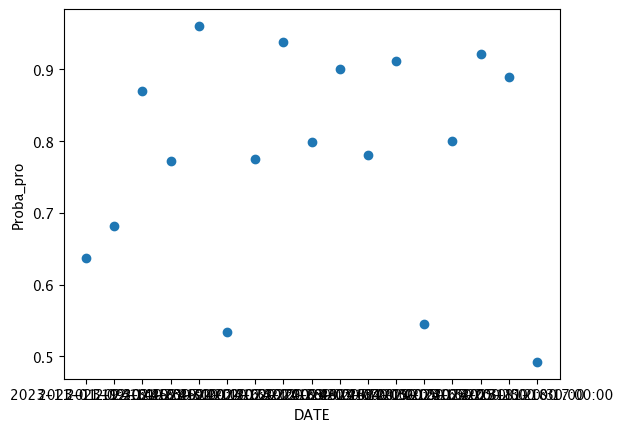

In [265]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


data['DATE'] = data['DATE'].astype('category')

data['TEAM_ID*DATE'] = data['TEAM_ID'].astype(str) + "*" + data['DATE'].astype(str)

model = smf.ols('label ~ Distance_20_25km_h + Distance_2540km_h + Distancemmin + Deceleration_max + Nb_acc_4_5ms + Nb_dec_5_4ms + Nombre_de_sprints ', data=data).fit()

print(model.summary())

# plot 
import matplotlib.pyplot as plt

# for one player 
data_player = data[data['PLAYER_NAME'] == 'T.Magnin']

plt.scatter(data_player['DATE'], data_player['proba_pro'])
plt.xlabel('DATE')
plt.ylabel('Proba_pro')

plt.show()

